
# Линейная регрессия. Практическая работа

## Цель практической работы

Научиться строить модель линейной регрессии на реальных данных.

## Что входит в практическую работу


1. Загрузить данные и ознакомиться с ними.
2. Изучить данные и провести анализ.
3. Разделить данные на обучающую и тестовую выборки.
4. Реализовать построение модели с помощью  библиотеки scikit-learn.
5. Получить качество модели с помощью MSE, MAE.


## Что оценивается 

* Выполнены все этапы работы.
* Сделан вывод по результатам.
* Модель не переобучена.
* Получена модель хорошего качества.

## Как отправить работу на проверку

Скачайте файл с заданиями в материалах, откройте его через Jupyter Notebook и выполните задачи. Сохраните изменения при помощи опции Save and Checkpoint из вкладки меню File или кнопки Save and Checkpoint на панели инструментов. Отправьте через форму ниже итоговый файл Jupyter Notebook (в формате .ipynb) или ссылку на него.



## Что нужно сделать

Пусть у нас имеется некоторый набор данных `sales.csv` о продажах квартир:

- **SalePrice** (цена продажи, *зависимая переменная*).
- **GrLivArea** (наземная жилая зона).
- **OverallQuality** (общее качество).
- **GarageArea** (территория гаража).
- **SaleCondition** (условия сделки).

Реализуйте построение модели линейной регрессии на этих данных. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE. Определите, что вы не переобучились.

### 1. Импорт библиотек

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error, root_mean_squared_error, confusion_matrix

### 2. Загрузка данных

In [3]:
df = pd.read_csv("sales_4GMQGIR.csv")

In [5]:
df

,SalePrice,GrLivArea,GarageArea,OverallQual,Street,SaleCondition
0,208500,1710,548,7,Pave,Normal
1,181500,1262,460,6,Pave,Normal
2,223500,1786,608,7,Pave,Normal
3,140000,1717,642,7,Pave,Abnorml
4,250000,2198,836,8,Pave,Normal
...,...,...,...,...,...,...
1455,175000,1647,460,6,Pave,Normal
1456,210000,2073,500,6,Pave,Normal
1457,266500,2340,252,7,Pave,Normal
1458,142125,1078,240,5,Pave,Normal


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SalePrice      1460 non-null   int64 
 1   GrLivArea      1460 non-null   int64 
 2   GarageArea     1460 non-null   int64 
 3   OverallQual    1460 non-null   int64 
 4   Street         1460 non-null   object
 5   SaleCondition  1460 non-null   object
dtypes: int64(4), object(2)
memory usage: 68.6+ KB


In [11]:
df.describe()

,SalePrice,GrLivArea,GarageArea,OverallQual
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,1515.463699,472.980137,6.099315
std,79442.502883,525.480383,213.804841,1.382997
min,34900.000000,334.000000,0.000000,1.000000
25%,129975.000000,1129.500000,334.500000,5.000000
50%,163000.000000,1464.000000,480.000000,6.000000
75%,214000.000000,1776.750000,576.000000,7.000000
max,755000.000000,5642.000000,1418.000000,10.000000


### 3. Первичный анализ

1. Проведите анализ данных, посмотрите на индивидуальные графики зависимости целевой функции и отдельной переменной. Нередко, если признаков в выборке не так много, удобно построить [sns.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html).
2. Закодируйте категориальные признаки (например, с помощью [pd.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)).
3. Подумайте, можно ли здесь создать дополнительные переменные из имеющихся.
4. Сделайте предварительные выводы.

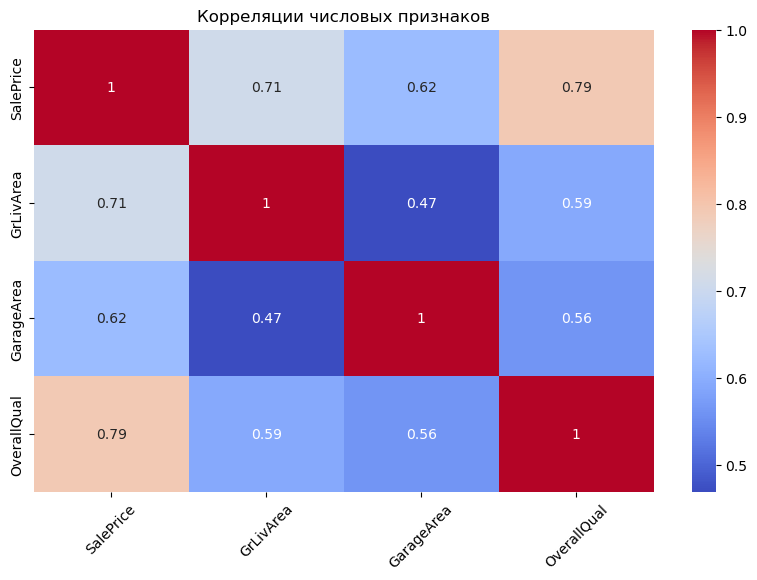

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Корреляции числовых признаков")
plt.xticks(rotation=45)
plt.show()

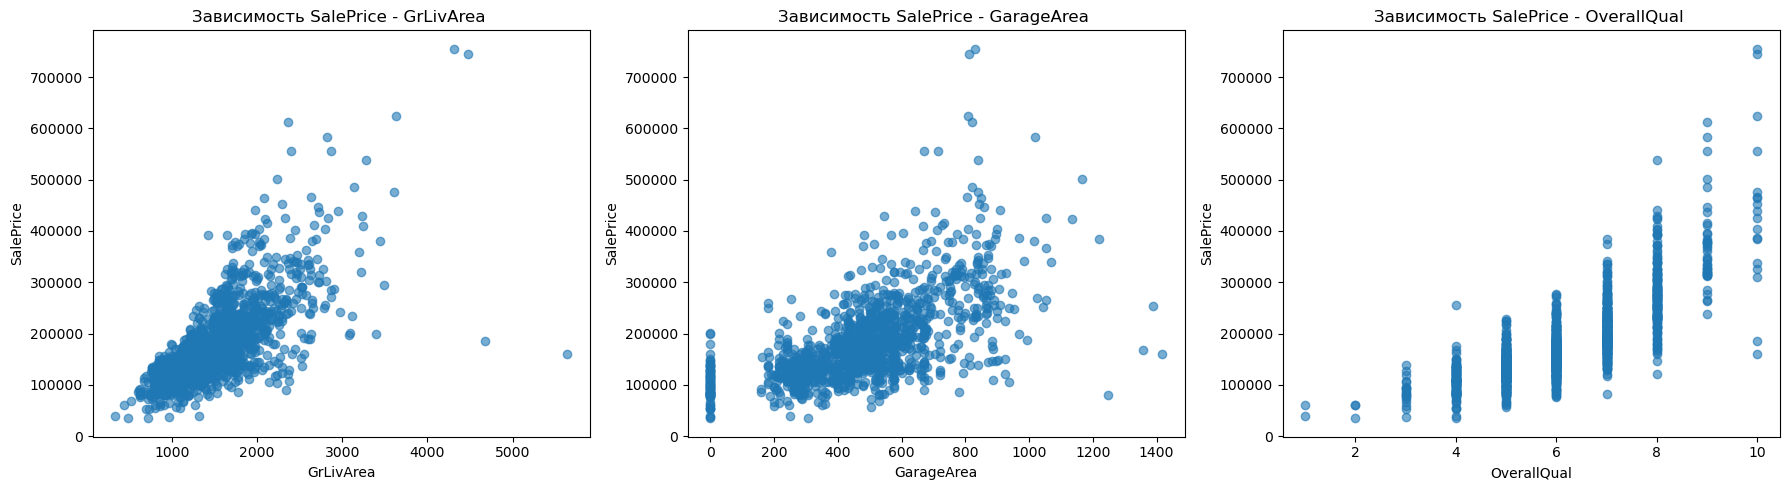

In [44]:
numeric_features = ['GrLivArea', 'GarageArea', 'OverallQual']

# Создаем subplot
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, feature in enumerate(numeric_features):
    axes[i].scatter(df[feature], df['SalePrice'], alpha=0.6)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('SalePrice')
    axes[i].set_title(f"Зависимость SalePrice - {feature} ")

plt.tight_layout()
plt.show()

In [69]:
df.nunique()

SalePrice        663
GrLivArea        861
GarageArea       441
OverallQual       10
Street             2
SaleCondition      6
dtype: int64

In [71]:
df.duplicated().sum()

1

In [86]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [74]:
df.isnull().sum().sum()

0

In [66]:
obj_features = list(df.select_dtypes(include="object").columns)

for i in obj_features:
    print(f"Уникальные значения для {i} - {df[i].unique()} кол-во: {df[i].nunique()}")

Уникальные значения для Street - ['Pave' 'Grvl'] кол-во: 2
Уникальные значения для SaleCondition - ['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family'] кол-во: 6


In [88]:
le = LabelEncoder()
df["Street"] = le.fit_transform(df["Street"])

In [96]:
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df["SaleCondition"].to_frame())

In [98]:
X_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())
X_encoded

df = df.drop("SaleCondition", axis=1)
df = pd.concat([df.reset_index(drop=True), X_encoded.reset_index(drop=True)], axis=1)

In [100]:
df

,SalePrice,GrLivArea,GarageArea,OverallQual,Street,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,208500,1710,548,7,1,0.0,0.0,0.0,0.0,1.0,0.0
1,181500,1262,460,6,1,0.0,0.0,0.0,0.0,1.0,0.0
2,223500,1786,608,7,1,0.0,0.0,0.0,0.0,1.0,0.0
3,140000,1717,642,7,1,1.0,0.0,0.0,0.0,0.0,0.0
4,250000,2198,836,8,1,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1454,175000,1647,460,6,1,0.0,0.0,0.0,0.0,1.0,0.0
1455,210000,2073,500,6,1,0.0,0.0,0.0,0.0,1.0,0.0
1456,266500,2340,252,7,1,0.0,0.0,0.0,0.0,1.0,0.0
1457,142125,1078,240,5,1,0.0,0.0,0.0,0.0,1.0,0.0


In [121]:
df.isnull().values.any()

False

In [147]:
scaler = StandardScaler()
df[df.select_dtypes(include=["int", "float"]).columns] = scaler.fit_transform(df[df.select_dtypes(include=["int", "float"]).columns])

По матрице корреляций можем заметить, что OverallQual с SelePrice имеют сильную положительную связь. Отметим хорошую свзять между SalePrice OverallQual - 0,71

Также, по некоторым скаттерам видим, что например SalePrcie увеличивается  при росте (наземная жилая зона). Тоже самое происхлдит и с GarageArea OverallQual по сравнению с SalePice.
Дубликаты удалил, данные в порядке.

### 4. Разделение на обучающую и тестовую выборки

In [152]:
X = df.drop("SalePrice", axis=1)
y = df.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### 5. Обучение модели линейной регрессии

Дополнительно можно взглянуть на коэффициенты и смещение обученной модели.

In [155]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 6. Получение предсказаний для обучающей и тестовой выборок

In [179]:
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

### 7. Проверка предсказаний

1. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE.
2. Постройте диаграмму рассеяния целевой и предсказанной переменных. 

In [165]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {round(mae, 3)}")
print(f"MSE: {round(mse, 3)}")
print(f"RMSE: {round(rmse, 3)}")
print(f"R²: {round(r2, 3)}\n")

MAE: 0.33
MSE: 0.239
RMSE: 0.489
R²: 0.779



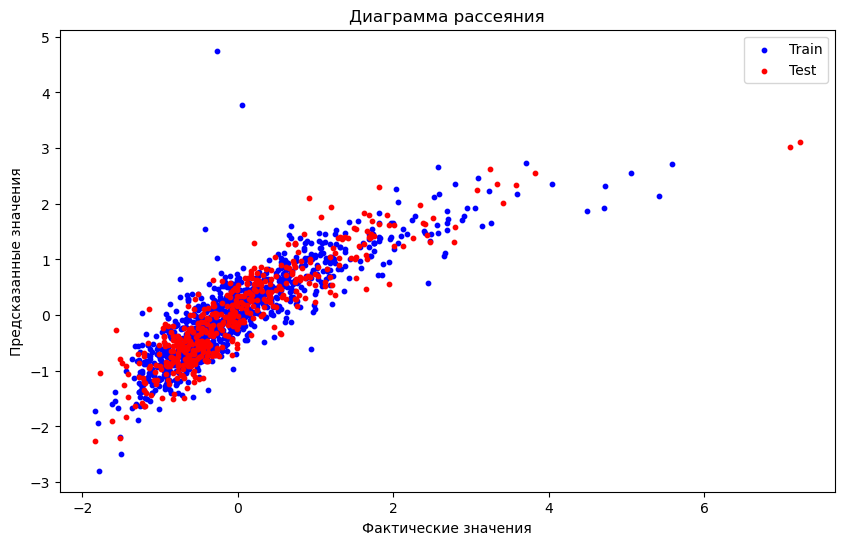

In [195]:
plt.figure(figsize=(10, 6))

plt.scatter(y_train, y_pred_train, s=10, c="b", label="Train")

plt.scatter(y_test, y_pred, s=10, c="r", label="Test")

plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Диаграмма рассеяния")
plt.legend()
plt.show()